# Reconnaissance de chiffres manuscrits avec scikit-learn
@ Colin Bernet IP2I Lyon

## Échantillon de données de chiffres manuscrits

Une version basse résolution de cet échantillon est fourni avec scikit-learn.

On commence par charger l'échantillon : 

In [13]:
from sklearn import datasets
digits = datasets.load_digits()

Puis on imprime la première image : 

In [53]:
print(digits.images[0])

[[ 0.  3. 14. 15.  6.  0.  0.  0.]
 [ 0.  7. 15. 14. 15.  0.  0.  0.]
 [ 0.  2.  7.  2. 14.  3.  0.  0.]
 [ 0.  0.  0.  1. 14.  4.  0.  0.]
 [ 0.  0.  0.  7. 15.  2.  0.  0.]
 [ 0.  0.  5. 15. 14.  4.  1.  0.]
 [ 0.  4. 15. 16. 16. 16.  6.  0.]
 [ 0.  4. 15. 13. 12. 11.  1.  0.]]


Comme toutes les images de l'échantillon, celle-ci est une image de 8x8 pixels, noir et blanc (un seul niveau de couleur par pixel). On peut l'afficher de la manière suivante, en indiquant également l'étiquette correspondante (le chiffre auquel correspond l'image) : 

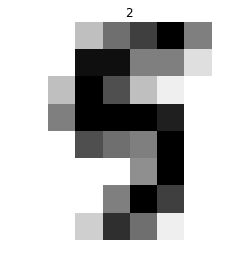

In [31]:
import matplotlib.pyplot as plt
plt.imshow(digits.images[0],cmap='binary')
plt.title(digits.target[0])
plt.axis('off')
plt.show()

Nous allons entraîner un réseau de neurones simple à reconnaître les chiffres dans ces images. Ce réseau va prendre en entrée des tableaux 1D de 8x8=64 valeurs. Nous devons donc convertir nos images 2D en tableaux 1D :

In [32]:
x = digits.images.reshape((len(digits.images), -1))
# x contient toutes les images en version 1D.
# nous imprimons ici la première, que nous avons déjà vue : 
print(x[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


Le réseau va agir comme une fonction permettant de passer d'un tableau de 64 valeurs en entrée à une valeur en sortie, son estimation du chiffre. Voici les valeurs de sortie : 

In [33]:
y = digits.target

In [ ]:
print(len(digits.images)) # Nombre d'images dans le set d'échantillons

## Définition et entraînement du réseau

Nous décidons de créer un réseau de neurones relativement simple, avec une seule couche de 15 neurones : 

In [54]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(15,))

Nous allons entraîner ce réseau sur les 1000 premières images de notre échantillon, et réserver les images suivantes pour tester les performances du réseau : 

In [55]:
x_train = x[:1000]
y_train = y[:1000]
x_test = x[1000:]
y_test = y[1000:]

In [56]:
mlp.fit(x_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(15,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

Et voilà ! nous pouvons maintenant regarder ce que donne le réseau pour les images suivantes, qui n'ont pas été vues par le réseau lors de l'entraînement : 

In [57]:
mlp.predict(x_test[:10])

array([1, 4, 0, 5, 3, 6, 9, 6, 1, 7])

In [58]:
y_test[:10]

array([1, 4, 0, 5, 3, 6, 9, 6, 1, 7])

Pour les 10 premières images de test, les estimations sont excellentes ! 

## Performances

Nous pouvons maintenant évaluer le réseau pour toutes les images de test

In [78]:
y_pred = mlp.predict(x_test)

0.11794228356336262

Puis rechercher les images pour lesquelles le réseau s'est trompé : 

In [60]:
error = (y_pred != y_test)

Voici le calcul du taux d'erreur :

In [61]:
import numpy as np
np.sum(error) / len(y_test)

0.11794228356336262

environ 11%, ce qui veut dire que 89% des prédictions sont correctes: 

Nous pouvons enfin sélectionner les mauvaises prédictions pour les afficher :

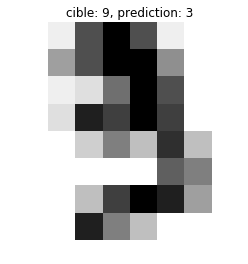

In [81]:
x_error = x_test[error].reshape((-1, 8,8))
y_error = y_test[error]
y_pred_error = y_pred[error]
i = 1
plt.imshow(x_error[i],cmap='binary')
plt.title(f'cible: {y_error[i]}, prediction: {y_pred_error[i]}')
plt.axis('off')
plt.show()

Comme on peut le voir, il est difficile de classifier ces images, même pour un humain.

Pour de meilleures performances, il faudrait utiliser des images de plus haute résolution et un réseau de neurones plus complexe, comme un réseau convolutionnel.
